<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M3_AST_21_Text_to_Speech_Models_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 21 : Implementation of Text-to-Speech (TTS) Model

## Learning Objectives

At the end of the experiment, you will be able to

* understand Tacotron, Fastspeech, and Glowtts
* use pretrained models to build Text-to-speech model and evaluate them
* perform model training for Tacotron2
 


### **Dataset Description**

The LJSpeech dataset is a public domain speech dataset consisting of 13,100 short audio clips of a single speaker reading passages from 7 non-fiction books. A transcription is provided for each clip. Clips vary in length from 1 to 10 seconds and have a total length of approximately 24 hours.

The texts were published between 1884 and 1964, and are in the public domain. The audio was recorded in 2016-17 by the LibriVox project and is also in the public domain.

The datasets can be downloaded from the following [link](https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2)

#### **About DataSet**

1. The audio clips range in length from approximately 1 second to 10 seconds. They were segmented automatically based on silences in the recording. Clip boundaries generally align with sentence or clause boundaries, but not always.

2. The text was matched to the audio manually, and a QA pass was done to ensure that the text accurately matched the words spoken in the audio.

3. The original LibriVox recordings were distributed as 128 kbps MP3 files. As a result, they may contain artifacts introduced by the MP3 encoding.

#### **File Format**

Metadata is provided in transcripts.csv. This file consists of one record per line, delimited by the pipe character (0x7c). The fields are:

1. **ID**: This is the name of the corresponding .wav file
2. **Transcription**: Words spoken by the reader (UTF-8)
3. **Normalized Transcription**: Transcription with numbers, ordinals, and monetary units expanded into full words (UTF-8).

Each audio file is a single-channel 16-bit PCM WAV with a sample rate of 22050 Hz.



### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M3_AST_21_Text_to_Speech_Models_C" #name of the notebook

def setup():
    #ipython.magic("sx wget ")
    #ipython.magic("sx wget ")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
%tensorflow_version 1.x
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import os, sys
from os.path import exists, join, basename, splitext

# Downloading the github repository

tacotron_git_repo_url = 'https://github.com/NVIDIA/tacotron2.git'
fastspeech_git_repo_url = 'https://github.com/Talentsprint2011/FastSpeech.git'
glowtts_git_repo_url = 'https://github.com/Talentsprint2011/glowtts.git'
TTS_utils_repo_url = 'https://github.com/Talentsprint2011/ASR_TTS.git'

# Splitting the text to get the name of the model
tacotron_project_name = splitext(basename(tacotron_git_repo_url))[0]
fastspeech_project_name = splitext(basename(fastspeech_git_repo_url))[0]
glowtts_project_name = splitext(basename(glowtts_git_repo_url))[0]
TTS_utils_project_name = splitext(basename(TTS_utils_repo_url))[0]

if not exists(tacotron_project_name):
  !git clone -q --recursive {tacotron_git_repo_url}
  !cd {tacotron_project_name}/waveglow && git checkout 9168aea
  !pip install -q librosa unidecode

if not exists(fastspeech_project_name):
    !git clone -q --recursive {fastspeech_git_repo_url}

if not exists(glowtts_project_name):
    !git clone -q --recursive {glowtts_git_repo_url}

if not exists(TTS_utils_project_name):
    !git clone -q --recursive {TTS_utils_repo_url}

!pip install git+https://github.com/Talentsprint2011/ASR_TTS.git
sys.path.append(join(tacotron_project_name, 'waveglow/'))
sys.path.append(tacotron_project_name)
sys.path.append(fastspeech_project_name)
sys.path.append(glowtts_project_name)

TensorFlow 1.x selected.
Previous HEAD position was 5bc2a53 README.md: reporting correct number after finding bug in inference time code
HEAD is now at 9168aea README.md: layout
     |████████████████████████████████| 235 kB 5.4 MB/s 
  Cloning https://github.com/Talentsprint2011/ASR_TTS.git to /tmp/pip-req-build-bpc60hxe
  Running command git clone -q https://github.com/Talentsprint2011/ASR_TTS.git /tmp/pip-req-build-bpc60hxe
  Created wheel for ASR-TTS: filename=ASR_TTS-0.0.3-py3-none-any.whl size=8726 sha256=5ef447cee301a483d85d22bac23c19e92c144916d26fb9bb34433ecffb94f285
  Stored in directory: /tmp/pip-ephem-wheel-cache-nv68k3tr/wheels/2b/08/af/a601bb52445b551db6a690c7a658fbb225e863103286469f66
Successfully built ASR-TTS


In [5]:
import json
import time
import torch
import random
import matplotlib
import numpy as np
import IPython.display as ipd
import matplotlib.pylab as plt
from scipy.io import wavfile
from IPython.display import clear_output
import ipywidgets as widgets
from tqdm import tqdm
from ASR_TTS import tts
from ASR_TTS.utils import plot_data, plot_data_3x, download_all_models
# Text processing toolkit
!pip install unidecode
plt.rcParams["axes.grid"] = False

### Loading the pretrained models

In [6]:
def download_fn(file_id, file_name):
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
tacotron2_pretrained, fastspeech_pretrained, glowtts_pretrained, waveglow_pretrained  = download_all_models(download_fn)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1002      0 --:--:-- --:--:-- --:--:--  1000
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  107M  100  107M    0     0  74.0M      0  0:00:01  0:00:01 --:--:--  207M

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3743      0 --:--:-- --:--:-- --:--:--  3743
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  283M  100  283M    0     0  69.5M      0  0:00:04  0:00:04 --:--:-- 92.1M

  % Total    % Received % Xferd  Average Speed   

In [7]:
# Evaluate TTS model with different datasets
tts.list_datasets()

Training
+----------+--------------+-----------+----------+-----------------------------+
| dataset  | num speakers | num sente | duration |            link             |
|          |              |   nces    |          |                             |
+----------+--------------+-----------+----------+-----------------------------+
| ljspeech |      1       |   13100   | 24 hours | https://keithito.com/LJ-Spe |
|          |              |           |          |        ech-Dataset/         |
+----------+--------------+-----------+----------+-----------------------------+
Evaluation
+------------+---------------+---------------------------------------+---------+
|  dataset   | num sentences |                source                 | evaluat |
|            |               |                                       | ion met |
|            |               |                                       |  rics   |
+------------+---------------+---------------------------------------+---------+
| ljspee

In [8]:
# Listing the model names, the pretrained model and links used 
tts.list_models()

Text to Spectogram
+------------+------------------------+---------------------------+------------+
| model name |      publication       |           code            | pretrained |
+------------+------------------------+---------------------------+------------+
| tacotron2  | https://arxiv.org/pdf/ | https://github.com/NVIDIA |  LJSpeech  |
|            |     1712.05884.pdf     |        /tacotron2         |            |
+------------+------------------------+---------------------------+------------+
| fastspeech | https://arxiv.org/pdf/ | https://github.com/xcmyz/ |  LJSpeech  |
|            |     1905.09263.pdf     |        FastSpeech         |            |
+------------+------------------------+---------------------------+------------+
|  glow-tts  | https://arxiv.org/pdf/ | https://github.com/jaywal |  LJSpeech  |
|            |     2005.11129.pdf     |      nut310/glow-tts      |            |
+------------+------------------------+---------------------------+------------+
Vocoder
+

### **TACOTRON2**

A text-to-speech synthesis system typically consists of multiple stages, such as a text analysis frontend, an acoustic model and an audio synthesis module. Building these components often requires extensive domain expertise and may contain brittle design choices. Here, we are using **Tacotron**, an end-to-end generative text-to-speech model that synthesizes speech directly from characters. Given `<text, audio>` pairs, the model can be trained completely from scratch with random initialization. Tacotron achieves a 3.82 subjective 5-scale mean opinion score on US English, outperforming a production parametric system in terms of naturalness.It does not require phoneme-level alignment, so it can easily scale to using large amounts of acoustic data with transcripts. In addition, since Tacotron generates speech at the frame level, it’s substantially faster than sample-level autoregressive methods.

#### Model Architecture


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/tacotron2%20architecture1.png" width=600px height=400px/>
</center>
<br><br>

To know more about the architecture click [here](https://arxiv.org/pdf/1712.05884.pdf).




Let us import all the packages required to implement tacotron2

In [9]:
from hparams import create_hparams
from model import Tacotron2
from layers import TacotronSTFT
from audio_processing import griffin_lim
from text import text_to_sequence
from denoiser import Denoiser
from glow import WaveGlow

Initialize **waveglow** with the pretrained model.

In [10]:
# Loading waveglow with tacotron
waveglow_config = json.load(open('%s/waveglow/config.json' % tacotron_project_name))['waveglow_config']

# Loading the hyperparameters
waveglow = WaveGlow(**waveglow_config)

# Loading the pretrained model from its path
waveglow.load_state_dict(torch.load(waveglow_pretrained)['model'].state_dict())
_ = waveglow.cuda().eval()
for k in waveglow.convinv:
    k.float()
denoiser = Denoiser(waveglow) 

Further, we will initialize tacotron2 with the pretrained model. Here, we are defining the hyperparameter and loading the model according to the hyperparameters.

In [11]:
torch.set_grad_enabled(False)
hparams = create_hparams()
hparams.sampling_rate = 22050
tacotron_model = Tacotron2(hparams)
tacotron_model.load_state_dict(torch.load(tacotron2_pretrained)['state_dict'])
_ = tacotron_model.cuda().eval()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Synthesize a text or replace the TEXT with your text if you want try out another one.


In [12]:
TEXT = "Today's assignment is on text to speech"

Here, we will creates a tensor representation of the input text sequence `(example_text)` using `tacotron2.text_to_sequence()`.



In [13]:
sequence = np.array(text_to_sequence(TEXT, ['english_cleaners']))[None, :]
sequence = torch.autograd.Variable(torch.from_numpy(sequence)).long()
sequence = sequence.cuda()

#### Mel Spectogram

Before moving ahead, you should know about **Mel Spectogram**.

Mel spectrogram is a spectrogram that is converted to a Mel scale. Then, what is the spectrogram and The Mel Scale? Let us have a look at it.

**The Mel Scale**

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.
In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the **mel scale**. We perform a mathematical operation on frequencies to convert them to the mel scale.

<center>
<img src="
https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/mel%20scale.gif" width=400px height=350px/>
</center>
<br><br>

**The Mel Spectrogram**

A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale and the representation of a mel spectogram is given below.

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/mel%20spectogram.png" width=400px height=300px/>
</center>
<br><br>





Now, we will convert the text into mel spectrogram using tacotron2 and plot it. It is a commonly used feature representation which acts as the target in the speech synthesis.


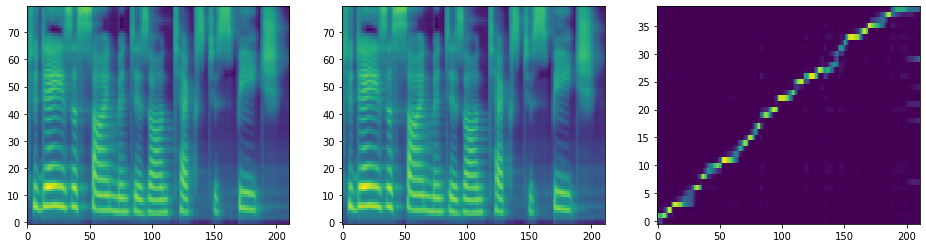

In [14]:
mel_outputs, mel_outputs_postnet, _, alignments = tacotron_model.inference(sequence)
plot_data_3x((mel_outputs.data.cpu().numpy()[0],
           mel_outputs_postnet.data.cpu().numpy()[0],
           alignments.data.cpu().numpy()[0].T))

**First plot**: It is the final output of the tacotron2 model. 

**Second plot**: It is the output before the postnet layer (last layer in the model architecture).

**Third plot**: It is the alignment matrix and it is representing how the input text represents and the output speech feature frames are aligned. 
Here, the `x-axis` is the speech part and `y-axis` is the text part.

`waveglow.infer()` - Waveglow generates sound given the mel spectrogram.

In [15]:
audio = waveglow.infer(mel_outputs_postnet, sigma=0.666)
# Using the audio and playing it
ipd.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate)

In [16]:
# Removing waveglow bias: Removing any noise from waveglow predictions
audio_denoised = denoiser(audio, strength=0.01)[:, 0]
ipd.Audio(audio_denoised.cpu().numpy(), rate=hparams.sampling_rate)

### **FastSpeech**

A non-autoregressive text to speech (TTS) models such as **FastSpeech** can synthesize speech significantly faster than previous autoregressive models with comparable quality.

Here, we will understand the architecture design of FastSpeech. To generate a target melspectrogram sequence in parallel, we design a novel feed-forward structure, instead of using the encoder-attention-decoder based architecture as adopted by most sequence to sequence based autoregressive [14, 22, 25] and non-autoregressive [7, 8, 26] generation. The overall model architecture of
FastSpeech is shown in the below figure. Going further, We describe the components in detail.

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/fastspeech.png" width=600px height=300px/>
</center>
<br><br>

The overall architecture for FastSpeech is as follows: 

1. The feed-forward Transformer

2. The feed-forward Transformer block

3. The length regulator

4. The duration predictor. 

MSE loss denotes the loss between predicted and extracted duration, which only exists in the training process. NOw, let us discuss about these architecture elements.

**1. Feed-Forward Transformer**

The architecture for FastSpeech is a feed-forward structure based on self-attention in Transformer and 1D convolution . We call this structure as Feed-Forward Transformer (FFT), as shown in the figure 1(a). Feed-Forward Transformer stacks multiple **FFT blocks** for phoneme to mel-spectrogram transformation, with N blocks on the phoneme side, and N blocks on the mel-spectrogram side, with a length regulator in between to bridge the length gap between the phoneme and mel-spectrogram sequence. Each FFT block consists of a self-attention and 1D convolutional network, as shown in Figure 1(b). The self-attention network consists of a multi-head attention to extract the cross-position information. Different from the 2-layer dense network in
Transformer, we use a 2-layer 1D convolutional network with ReLU activation. The motivation is that the adjacent hidden states are more closely related in the character/phoneme and mel-spectrogram sequence in speech tasks. We evaluate the effectiveness of the 1D convolutional network in the experimental section. Following Transformer, residual connections, layer normalization, and dropout are added after the self-attention network and 1D convolutional network respectively.

**2. Length Regulator**

The length regulator (Figure 1c) is used to solve the problem of length mismatch between the phoneme and spectrogram sequence in the Feed-Forward Transformer, as well as to control the voice speed. The length of a phoneme sequence is usually smaller than that of its mel-spectrogram sequence, and each phoneme corresponds to several mel-spectrograms. We refer to the length of the mel-spectrograms that corresponds to a phoneme as the phoneme duration 

**3. Duration Predictor**

Phoneme duration prediction is important for the length regulator. As shown in Figure 1d, the duration predictor consists of a 2-layer 1D convolutional network with ReLU activation, each followed by the layer normalization and the dropout layer, and an extra linear layer to output a scalar, which
is exactly the predicted phoneme duration. Note that this module is stacked on top of the FFT blocks on the phoneme side and is jointly trained with the FastSpeech model to predict the length of 4 mel-spectrograms for each phoneme with the mean square error (MSE) loss. We predict the length in
the logarithmic domain, which makes them more Gaussian and easier to train. Note that the trained duration predictor is only used in the TTS inference phase, because we can directly use the phoneme duration extracted from an autoregressive teacher model in training.


Importing the required packages for implementation FastSpeech. 

In [17]:
from FastSpeech.fs_eval import get_DNN 
from FastSpeech import fs_hparams as hp
from FastSpeech import text

In [18]:
# Loading the FastSpeech model
fastspeech_model = get_DNN(fastspeech_pretrained)

Synthesize a text or replace the TEXT with your text if you want try out another one.

In [19]:
TEXT = ["Today's assignment is on text to speech"]

In [20]:
# Creating a tensor representation of the input text sequence
TEXT = [text.text_to_sequence(t, hp.text_cleaners) for t in TEXT]
text_ = np.array(TEXT[0])
text_ = np.stack([text_])

# Extracting the number of the character in the text sequence
src_pos = np.array([i+1 for i in range(text_.shape[1])])
src_pos = np.stack([src_pos])

# Converting numpy array into torch tensor and loading it to GPU
sequence = torch.from_numpy(text_).cuda().long()
src_pos = torch.from_numpy(src_pos).cuda().long()

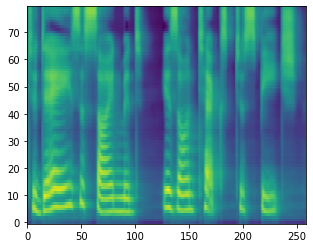

In [21]:
# Predicting the mel sepctogram from tensor representation of text
with torch.no_grad():
    _, mel = fastspeech_model.module.forward(sequence, src_pos, alpha=1)
mel = mel.contiguous().transpose(1, 2).squeeze().cpu().numpy()
plot_data(mel)

In [22]:
# Convert the generated mel spectrogram into an audio
audio = waveglow.infer(torch.from_numpy(mel).unsqueeze(0).cuda(), sigma=0.666)
ipd.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate)

### **Glow-TTS: A Generative Flow for Text-to-Speech**

Let us first understand why there is a necessity of another model which is Glow-TTS.

**Performance of other models**

Text-to-Speech (TTS) is the task to generate speech from text, and deep-learning-based TTS models have succeeded in producing natural speech indistinguishable from human speech. Among neural TTS models, autoregressive models such as Tacotron 2 show the state-of-the-art performance. Based on these autoregressive models, there have been many advances in generating diverse speech in terms of modelling different speaking styles or various prosodies.

**Problem with Autoregressive TTS models**

espite the high quality of autoregressive TTS models, there are a few difficulties in deploying end-to-end autoregressive models directly in real-time services. As the synthesizing time of the models grows linearly with the output length, undesirable delay caused by generating long speech can be propagated to the multiple pipelines of TTS systems without designing sophisticated frameworks. In addition, most of the autoregressive models show lack of robustness in some cases. For example, when the input text includes the repeated words, autoregressive TTS models often produce serious attention errors.

To overcome such limitations of the autoregressive TTS models, parallel TTS models such as **FastSpeech** have been proposed. These models can synthesize mel-spectrogram significantly faster than the autoregressive TTS models. In addition to the fast sampling, FastSpeech reduces the failure cases for the extremely hard sentences by enforcing its alignment monotonic.

**Problem with FastSpeech**

However, these strengths of parallel TTS models come from the well-aligned attention map between text and speech, which is extracted from their external aligner. Recently proposed parallel models address these challenges by extracting attention maps from the pre-trained autoregressive models. Therefore, the performance of the parallel TTS models critically depends on that of the autoregressive TTS models. Furthermore, since the parallel TTS models assume this alignment to be given during training, they cannot be trained without the external aligners.

Here, our goal is to eliminate the necessity of any external aligner from the training procedure of parallel TTS models. Therefore, **Glow-TTS** comes into consideration.

**What is Glow-TTS?**

Glow-TTS is a flow-based generative model for parallel TTS that can internally learn its own alignment. Glow-TTS is directly trained to maximize the log-likelihood of speech given text, and its sampling process is totally parallel due to the properties of the generative flow. In order to eliminate any dependency on other networks, we introduce Monotonic Alignment Search (MAS), a novel method to search for the most probable monotonic alignment with only text and latent representation of speech. This internal alignment search algorithm simplifies the entire training procedure of our parallel TTS models so that it requires only 3 days for training on two GPUs.

Without any external aligner, our parallel TTS model can generate mel-spectrograms 15.7 times faster than the autoregressive TTS model, Tacotron 2, while maintaining the comparable performance. Glow-TTS also provides diverse speech synthesis, in contrast to other TTS models, which have their stochasticities only in dropout operations. We can control some properties of synthesized samples from Glow-TTS by altering the latent variable of normalizing flows.


#### Loading all the prerequisites for Glow-TTS 

In [23]:
%cd glowtts/monotonic_align 
!python setup.py build_ext --inplace
%cd /content/
from text import text_to_sequence, cmudict
from text.symbols import symbols
from glowtts import glowtts_attentions, glowtts_modules, glowtts_models, glowtts_utils, glowtts_commons
from glowtts.text import text_to_sequence
# Copying the configuration files to be used by the pretrained models
!cp glowtts/configs/base.json glowtts/configs/config.json

/content/glowtts/monotonic_align
Compiling core.pyx because it changed.
[1/1] Cythonizing core.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/glowtts/monotonic_align/core.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'monotonic_align.core' extension
creating build
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I/usr/include/python3.7m -c core.c -o build/temp.linux-x86_64-3.

In [24]:
# Loading the hyperparameter
hps = glowtts_utils.get_hparams_from_dir('glowtts/configs/')

# Normalizing the output audio
def normalize_audio(x, max_wav_value=hps.data.max_wav_value):
    return np.clip((x / np.abs(x).max()) * max_wav_value, -32768, 32767).astype("int16")

# Defining the Glow-TTS model
glowtts_model = glowtts_models.FlowGenerator(
    len(symbols) + getattr(hps.data, "add_blank", False),
    out_channels=hps.data.n_mel_channels,
    **hps.model).to("cuda")

# Loading a pretrained Glow-TTS model
glowtts_utils.load_checkpoint(glowtts_pretrained, glowtts_model)
glowtts_model.decoder.store_inverse() 
_ = glowtts_model.eval()

INFO:root:Loaded checkpoint 'glowtts_checkpoint.pth' (iteration 0)


Synthesize a text or replace the TEXT with your text if you want try out another one.

In [25]:
tst_stn = "Today's assignment is on text to speech"

Preprocssing steps for input text.

In [26]:
cmu_dict = cmudict.CMUDict('glowtts/data/cmu_dictionary')
#cmudict = cmudict.CMUDict('glow_tts/data/cmu_dictionary')
if getattr(hps.data, "add_blank", False):
    text_norm = text_to_sequence(tst_stn.strip(), ['english_cleaners'], cmu_dict)
    text_norm = commons.intersperse(text_norm, len(symbols))
else:
    tst_stn = " " + tst_stn.strip() + " "
    text_norm = text_to_sequence(tst_stn.strip(), ['english_cleaners'], cmu_dict)

Tensor representation of the text.

In [27]:
sequence = np.array(text_norm)[None, :]
x_tst = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
x_tst_lengths = torch.tensor([x_tst.shape[1]]).cuda()

Predicting the mel sepctogram from tensor representation of text.

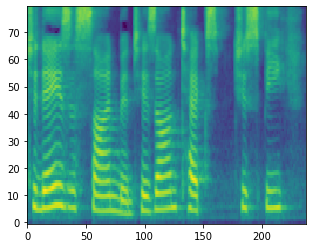

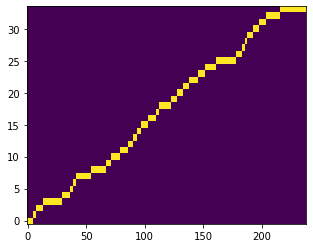

In [28]:
with torch.no_grad():
  noise_scale = .667
  length_scale = 1.0
  (y_gen_tst, *_), *_, (attn_gen, *_) = glowtts_model(x_tst, x_tst_lengths, gen=True, noise_scale=noise_scale, length_scale=length_scale)
plot_data(y_gen_tst.squeeze().cpu().numpy())
plot_data(attn_gen.squeeze().cpu().numpy())

In [29]:
# Convert the generated mel spectrogram into an audio
audio = waveglow.infer(y_gen_tst, sigma=.666)
ipd.Audio(normalize_audio(audio[0].clamp(-1,1).data.cpu().float().numpy()), rate=hps.data.sampling_rate)

Defining a function `batch_process` which takes the input as the `model name` and the `TEXT`.

In [30]:
# Preprocessing the input text for any given model
def batch_process(modelname, TEXT, device='cuda'): # device = 'cuda' or 'cpu'
    text_sequences = []
    text_positions = []
    if modelname == 'tacotron2':
        for TEXT_ in TEXT:
            sequence = np.array(text_to_sequence(TEXT_, ['english_cleaners']))[None, :]
            sequence = torch.autograd.Variable(torch.from_numpy(sequence)).long()
            text_sequences.append(sequence.to(device))
            
    elif modelname == 'fastspeech':
        for TEXT_ in TEXT:
            TEXT_ = np.stack([np.array(text.text_to_sequence(TEXT_, hp.text_cleaners))])
            src_pos = np.stack([np.array([i+1 for i in range(TEXT_.shape[1])])])
            text_positions.append(torch.from_numpy(src_pos).cuda().long())
            text_sequences.append(torch.from_numpy(TEXT_).cuda().long())

    elif modelname == 'glowtts':
        cmu_dict = cmudict.CMUDict('glowtts/data/cmu_dictionary')
        for TEXT_ in TEXT: 
            if getattr(hps.data, "add_blank", False):
                text_norm = text_to_sequence(TEXT_.strip(), ['english_cleaners'], cmu_dict)
                text_norm = commons.intersperse(text_norm, len(symbols))
            else:
                TEXT_ = " " + TEXT_.strip() + " "
                text_norm = text_to_sequence(TEXT_.strip(), ['english_cleaners'], cmu_dict)
            sequence = np.array(text_norm)[None, :]
            text_sequences.append(torch.autograd.Variable(torch.from_numpy(sequence)).to(device).long())
            text_positions.append(torch.tensor([x_tst.shape[1]]).to(device))
    else:
        raise NotImplementedError
    return text_sequences, text_positions

Making predictions for the model using the input text.

In [31]:
# Predictions from the preprocessed text into mel spectograms and waveforms
def predict(modelname, input_text, positions):
    predicted = []
    wav = []
    num_samples = len(input_text)
    for i in tqdm(range(num_samples)):
        if modelname == 'tacotron2':
            predited_, _, _, _ = tacotron_model.inference(input_text[i])
            predicted.append(predited_)
        elif modelname == 'fastspeech':
            
            with torch.no_grad():
                _, predicted_ = fastspeech_model.module.forward(input_text[i], positions[i], alpha=1)
                predicted.append(predicted_.contiguous().transpose(1, 2))
        elif modelname == 'glowtts':
            (predicted_, *_), *_, (_, *_) = glowtts_model(input_text[i], positions[i], gen=True, noise_scale=0.667, length_scale=1.0)
            predicted.append(predicted_)
        else:
            raise NotImplementedError
        
        wav.append(waveglow.infer(predicted[-1], sigma=.666).cpu().numpy())
    return predicted, wav

#### Downloading the LJSpeech Dataset

In [32]:
if not os.path.exists('LJSpeech-1.1/'):
    !wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/LJSpeech-1.1.tar.bz2
    !tar xf LJSpeech-1.1.tar.bz2
    
ljspeech_path = 'LJSpeech-1.1/wavs/'

test_paths = {'common_voice_sentences':'ASR_TTS/ASR_TTS/common_voice_sentences_for_TTS.txt',
              'fastspeech_hard_sentences':'ASR_TTS/ASR_TTS/tts_hard_sentences_fs.txt',
              'ljspeech_sentences':'tacotron2/filelists/ljs_audio_text_test_filelist.txt'}

test_dataset = 'fastspeech_hard_sentences'
modelname = 'fastspeech'

# Creating a dictionary of input text as well as the audios
test_dict = tts.extract_test_pairs(test_dataset, test_paths, ljspeech_path)

--2021-11-06 14:37:27--  https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/LJSpeech-1.1.tar.bz2
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [application/octet-stream]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G  10.8MB/s    in 4m 1s   

2021-11-06 14:41:30 (10.9 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]



In [33]:
# Calling the batch process function to get text_sequences, text positions
text_sequences, text_positions = batch_process(modelname=modelname, TEXT=test_dict.values())
# Calling the predict function to get predicted_mel and wavs
predicted_mel, wavs = predict(modelname=modelname, input_text=text_sequences, positions=text_positions)

100%|██████████| 42/42 [02:57<00:00,  4.22s/it]


In [34]:
# Here we can listen the generated audio and the index represents which text file to play
index = 35
test_ = list(test_dict.values())[index]
print(test_)
ipd.Audio(wavs[index], rate=22050)

So we are back to Extended MAPI and C++ because . Extended MAPI does not have a dual interface VB or VB .Net can read .


**MOS Score** 

 **MOS, or, Mean Opinion Score**, is a measure of voice quality and is a quality measure that has been used in telephony for decades as a way to assess human users’ opinion of call quality. The test is used widely in VoIP networks to ensure quality voice transmission, test for quality issues, and provides a metric by which to measure voice degradation and performance.  

The most commonly used rating scale is the Absolute Category Ranking (ACR) scale, which ranges from 1 to 5. The levels of the Absolute Category Ranking are:

5 - Excellent

4 - Good

3 - Fair

2 - Poor

1 - Bad

In [35]:
# Preparing the test set predictions for MOS evaluation
# Here, the num_samples is the number of files to be considered for evaluation

args = tts.Args(test_dataset, modelname,num_samples=40)

audio_for_mos, text_for_mos = args.prepare_mos_files(wavs, list(test_dict.values()), ljspeech_path)   
mos_scoring = tts.mos_scoring
def clicked(arg):
    if args.i > len(audio_for_mos)-1: 
        clear_output()
        print(f'Evaluation done on {args.num_samples} samples!')
        args.score.append(mos_scoring.value)
        args.final_scores()
    else:
        args.score.append(mos_scoring.value)
        clear_output()
        print(text_for_mos[args.i])
        display_audio = ipd.Audio(audio_for_mos[args.i], rate=22050)
        display(display_audio)
        display(mos_scoring)
        args.i += 1
        display(next_button)
    
# Both the generated audio as well as actual audio from LJSpeech are mixed together. Once the MOS score have been provided
# for all the files the average MOS score for the generated as well as actual audio will be displayed

next_button = widgets.Button(description = 'Next')   
next_button.on_click(clicked)
display(next_button)

Starting MOS evaluation on fastspeech model with 20 sentences from fastspeech_hard_sentences


Button(description='Next', style=ButtonStyle())

### Training the TTS Model : Tacotron2

Previously, we just evaluated different pretrained models based on the predictions (audio). Now, we have 78 text audio pairs that we will consider for training the model. 

In [36]:
# Cloning the repository which has the training code
%tensorflow_version 1.x
!git clone https://github.com/Talentsprint2011/tacotron2_train_batch.git
!pip install unidecode

Cloning into 'tacotron2_train_batch'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 122 (delta 2), reused 113 (delta 0), pack-reused 0
Receiving objects: 100% (122/122), 20.61 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [37]:
%cd /content/tacotron2_train_batch

/content/tacotron2_train_batch


Here, the 78 audio text pairs are trained. At the end of each epoch the generated mel spectogram as well as their alignment matrix for one sample is stored.

Keep traing  the model for atleast 1 or 2 hrs and look into the results periodically to undertand the imporovement.

'''
mel spec folder: /content/tacotron2_train_batch/predicted_mel

alignment folder: /content/tacotron2_train_batch/alignment_plots
'''

In [ ]:
!python3 train.py --output_directory=outdir --log_directory=logdir

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

FP16 Run: False
Dynamic Loss Scaling: True
Distributed Run: False
cuDNN Enabled: True
cuDNN Benchmark: False
Epoch: 0
Train loss 0 52.123466
Validation loss 0: 32.955388  
Train loss 1 33.365215
Validation loss 1: 15.219878  
Train loss 2 17.298443
Validation loss 2: 12.589874  
Train loss 3 9.400224
Validation loss 3: 15.320398  
Epoch: 1
Train loss 4 6.826764
Validation loss 4: 15.247777  
Train loss 5 6.392668
Validation loss 5: 12.561007  
Train loss 6 6.333038
Validation loss 6: 10.436429  
Train loss 7 6.132811
Validation loss 7:  8.911132  
Epoch: 2
Train loss 8 6.170270
Validation loss 8:  8.042558  
Train loss 9 5.43809

Finally, this gives you an idea about how to train **Text-to-speech** models and how to monitor the progress and see if the model is learning or not.

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. State True or False : Deep Voice 3 uses RNN in place of  residual gated convolution to capture contextual information.  
Answer1 = "" #@param ["","True","False"]


In [ ]:
#@title Q.2. What does the CBHG network include? 
Answer2 = "" #@param ["","highway network, 2-D convolutional bank and Unidirectional-GRU","highway network, 1-D convolutional bank and Bidirectional-GRU","highway network, 1-D convolutional bank and Unidirectional-GRU","highway network, 2-D convolutional bank and Bidirectional-GRU"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "More questions" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")